In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# Import the no-hitter baseball dataset from csv
df = pd.read_csv('https://assets.datacamp.com/production/repositories/470/datasets/593c37a3588980e321b126e30873597620ca50b7/mlb_nohitters.csv')

In [3]:
df.head()

,date,game_number,winning_team,losing_team,winning_pitcher
0,18760715,140,NaN,NaN,NaN
1,18800612,1035,NaN,NaN,NaN
2,18800617,1046,NaN,NaN,NaN
3,18800819,1177,NaN,NaN,NaN
4,18800820,1179,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             294 non-null    int64 
 1   game_number      294 non-null    int64 
 2   winning_team     228 non-null    object
 3   losing_team      228 non-null    object
 4   winning_pitcher  228 non-null    object
dtypes: int64(2), object(3)
memory usage: 11.6+ KB


In [5]:
df['Date'] = df.date.astype('str')
df['Date'] = pd.to_datetime(df.Date, format="%Y%m%d")

In [19]:
df['timedelta'] = df.game_number.diff() - 1

In [20]:
df.head()

,date,game_number,winning_team,losing_team,winning_pitcher,Date,timedelta
0,18760715,140,NaN,NaN,NaN,1876-07-15,NaN
1,18800612,1035,NaN,NaN,NaN,1880-06-12,894.0
2,18800617,1046,NaN,NaN,NaN,1880-06-17,10.0
3,18800819,1177,NaN,NaN,NaN,1880-08-19,130.0
4,18800820,1179,NaN,NaN,NaN,1880-08-20,1.0


In [21]:
df.Date.max()

Timestamp('2015-10-03 00:00:00')

## Create "Modern" subset of data (1901-2015)

In [22]:
modern = df.query('Date > "1900-12-31"')

In [23]:
df.Date.min()

Timestamp('1876-07-15 00:00:00')

In [24]:
modern.Date.min()

Timestamp('1901-07-15 00:00:00')

## How often do we get no-hitters?

If you assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed. As you have seen, the Exponential distribution has a single parameter, which we will call $\tau$, the typical interval time. The value of the parameter $\tau$ that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters.

In [25]:
# Create series from timedelta column for time (in games) between no-hitter games
nohitter_times = modern.timedelta

In [29]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

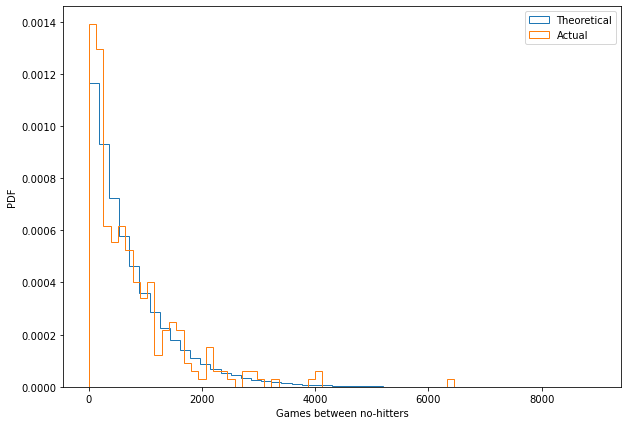

In [46]:
# Plot out the theoretical PDF and the actual data to see if it has an exponential distribution
# which we would expect if it follows a Poisson distribution (rare events)
fig, ax = plt.subplots(figsize=(10,7))
plt.hist(inter_nohitter_time, bins=50, histtype='step', density=True, label='Theoretical')
plt.hist(nohitter_times, bins=50, histtype='step', density=True, label='Actual')
plt.xlabel('Games between no-hitters')
plt.ylabel('PDF')
plt.legend()